**This is our first textbook.**
* Here we will learn to write some rudimentary python code and R code, in a notebook style setup, executing the same on a REMOTE Virtual Machine.

# Reading data from google drive

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
# Read the CSV file iris.csv
import pandas as pd
df = pd.read_csv ("/content/gdrive/MyDrive/PGSS2022/L1--6-28-2022/iris.csv", header=None)
df.columns = ['Sepal.Length','Sepal.Width', 'Petal.Length', 'Petal.Width', 'Class']
df


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
! pwd

/content


In [10]:
!top

=top - 20:11:08 up  1:00,  0 users,  load average: 0.29, 0.60, 0.49
Tasks:  22 total,   1 running,  19 sleeping,   0 stopped,   2 zombie
%Cpu(s): 11.1 us,  1.7 sy,  0.0 ni, 86.9 id,  0.2 wa,  0.0 hi,  0.1 si,  0.1 st
KiB Mem : 13298572 total, 10028504 free,  1031696 used,  2238372 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12088008 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
     43 root      20   0  200320  60556  15172 S   6.7  0.5   0:10.67 jupyter-+ 
   1018 root      20   0  609324 164548  54420 S   6.7  1.2   0:04.46 python3   
      1 root      20   0     992      4      0 S   0.0  0.0   0:00.75 docker-i+ 
      7 root      20   0  356516  67628  32756 S   0.0  0.5   0:12.97 node      
     17 root      20   0   35888   4780   3668 S   0.0  0.0   0:00.90 tail      
     29 root      20   0       0      0      0 Z   0.0  0.0   0:07.05 python3   
     30 root      20   0  156136  41324  12700 S   0.0  0.3   

In [29]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Explanatory Analysis of the data frame loaded from Github version of iris.csv

In [12]:
df['Class'].value_counts()



Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

In [14]:
df.groupby('Class').agg({'Sepal.Length': ['min', 'max', 'mean'],'Sepal.Width': ['min', 'max', 'mean'], 'Petal.Length': ['min', 'max'], 'Petal.Width': ['min', 'max']})

Sepal.Length             Sepal.Width             Petal.Length  \
                         min  max   mean         min  max   mean          min   
Class                                                                           
Iris-setosa              4.3  5.8  5.006         2.3  4.4  3.418          1.0   
Iris-versicolor          4.9  7.0  5.936         2.0  3.4  2.770          3.0   
Iris-virginica           4.9  7.9  6.588         2.2  3.8  2.974          4.5   

                     Petal.Width       
                 max         min  max  
Class                                  
Iris-setosa      1.9         0.1  0.6  
Iris-versicolor  5.1         1.0  1.8  
Iris-virginica   6.9         1.4  2.5

In [15]:
df.boxplot('Sepal.Length', 'Class')

NameError: ignored

In [ ]:
df.boxplot('Sepal.Width', 'Class')

In [ ]:
df.boxplot('Petal.Length', 'Class')

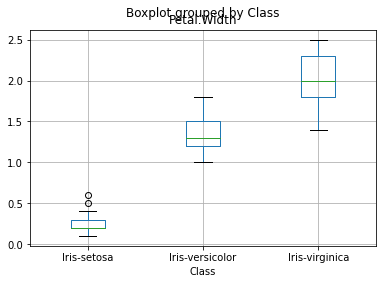

In [16]:
df.boxplot('Petal.Width', 'Class')

# Explanatory analysis of google sheeet data corresponding to PGSS CS Lab class of 2022

In [24]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS 2022 CS Lab Class ').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)
myClassData = pd.DataFrame.from_records(rows)

myClassData = myClassData.iloc[1:,:]

myClassData.columns = ['First Name', 'Last Name', 'Andrew ID', 'Github', 'Role', 'Non-Andrew Email',]
myClassData

[['First Name', 'Last Name', 'Andrew ID', 'Github', 'Role', 'Non-Andrew Email'], ['Prahlad', 'Menon', 'pgmenon', 'menonpg', 'Professor', ''], ['Aidan', 'Green', 'aidang', 'aidang56', 'Student', 'aidang626@gmail.com'], ['Nikola', 'Cao', 'nikolac', 'nikolacao', 'Student', 'cao.nikola.a@gmail.com'], ['Bea', 'Ricafort', 'bricafor', 'bricafor', 'Student', 'moiraangiebee@gmail.com'], ['Daniel', 'Zhang', 'danielz2', 'DanZfsd', 'Student', 'z331317@gmail.com'], ['Siming', 'Tang', 'simingt', 'Jelliphishi', 'Student', ''], ['Jai', 'Rastogi', 'jrastogi', 'jrastogi1349342', 'Student', ''], ['Sam', 'Wang', 'samuelw2', 'samuelwang23', 'Student', ''], ['Edison', 'DeWilde', 'edewilde', 'edewilde12', 'Student', ''], ['Hannah', 'Gong', 'hannahgo', 'hgna', 'Student', ''], ['Mason', 'Matich', 'mmatich', 'AWESDUDEtheCOOL', 'Student', ''], ['Diya', 'Hundiwala', 'dhundiwa', 'diyahundiwala', 'Student', 'diyahundiwala@gmail.com'], ['Eric', 'Cui', 'ecui', 'restlesstable29', 'Student', ''], ['Kurtis', 'Zhang', 'k

,First Name,Last Name,Andrew ID,Github,Role,Non-Andrew Email
1,Prahlad,Menon,pgmenon,menonpg,Professor,
2,Aidan,Green,aidang,aidang56,Student,aidang626@gmail.com
3,Nikola,Cao,nikolac,nikolacao,Student,cao.nikola.a@gmail.com
4,Bea,Ricafort,bricafor,bricafor,Student,moiraangiebee@gmail.com
5,Daniel,Zhang,danielz2,DanZfsd,Student,z331317@gmail.com
6,Siming,Tang,simingt,Jelliphishi,Student,
7,Jai,Rastogi,jrastogi,jrastogi1349342,Student,
8,Sam,Wang,samuelw2,samuelwang23,Student,
9,Edison,DeWilde,edewilde,edewilde12,Student,
10,Hannah,Gong,hannahgo,hgna,Student,


In [25]:
myClassData['Role'].value_counts()

Student      18
TA            3
Professor     1
Name: Role, dtype: int64

In [28]:
import numpy as np
myClassData['Non-Andrew Email'][myClassData['Non-Andrew Email']==""]=np.nan
myClassData['Non-Andrew Email'].isna().value_counts()

True     15
False     7
Name: Non-Andrew Email, dtype: int64